# 1. Data Importing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from pandas import Series, DataFrame
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GLD_ETF_df = pd.read_csv("/home/fabulouskorex/Documents/SPDR Gold Shares (GLD) Jan - Dec 2020.csv",parse_dates=True,index_col=0)
EQT_ETF_df = pd.read_csv("/home/fabulouskorex/Documents/Amundi CAC 40 UCITS ETF-C (C40.PA) Jan 2020 - Dec 2020.csv",parse_dates=True,index_col=0)
BTC_df = pd.read_csv("/home/fabulouskorex/Documents/Bitcoin USD (BTC-USD) Jan 2020 - Dec 2020.csv",parse_dates=True,index_col=0)

In [3]:
gold_ETF_df = pd.read_csv("/home/fabulouskorex/Documents/SPDR Gold Shares (GLD) April 2020 - December 2020.csv",parse_dates=True,index_col=0)
equity_ETF_df = pd.read_csv("/home/fabulouskorex/Documents/Amundi CAC 40 UCITS ETF-C (C40.PA) April 2020 - December 2020.csv",parse_dates=True,index_col=0)
bitcoin_df = pd.read_csv("/home/fabulouskorex/Documents/Bitcoin USD (BTC-USD) April 2020 - December 2020.csv",parse_dates=True,index_col=0)

# 2. Data Processing 

In [4]:
gold_ETF_df['Daily_return_pct'] = gold_ETF_df['Close'].pct_change(1)
gold_ETF_df.head()


,Open,High,Low,Close,Adj Close,Volume,Daily_return_pct
Date,,,,,,,
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400,NaN
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300,0.016393
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100,0.004937
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300,0.027711
2020-04-07,155.330002,156.139999,154.380005,156.039993,156.039993,9195400,-0.005354


In [5]:
equity_ETF_df['Daily_return_pct'] = equity_ETF_df['Close'].pct_change(1)
equity_ETF_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_return_pct
Date,,,,,,,
2020-04-01,62.340000,62.490002,61.330002,61.520000,61.520000,0.0,NaN
2020-04-02,61.720001,62.720001,61.599998,62.090000,62.090000,0.0,0.009265
2020-04-03,61.910000,62.099998,61.570000,61.889999,61.889999,0.0,-0.003221
2020-04-06,63.500000,64.500000,63.250000,64.500000,64.500000,40092.0,0.042172
2020-04-07,65.470001,66.650002,65.470001,66.360001,66.360001,0.0,0.028837


In [6]:
bitcoin_df['Daily_return_pct'] = bitcoin_df['Close'].pct_change(1)
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_return_pct
Date,,,,,,,
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,40346426265,NaN
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,6793.624512,47660646124,0.028281
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,6733.387207,38976504902,-0.008867
2020-04-04,6738.382813,6878.953613,6696.484863,6867.527344,6867.527344,33185988583,0.019922
2020-04-05,6862.537598,6883.414063,6715.929199,6791.129395,6791.129395,29510409856,-0.011125


# 3.1 Returns

In [7]:
EQT_ETF_df['Returns'] = EQT_ETF_df['Close'].pct_change(1)
EQT_ETF_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,88.589996,89.239998,88.589996,89.239998,89.239998,124.0,NaN
2020-01-03,88.489998,88.889999,88.309998,88.769997,88.769997,0.0,-0.005267
2020-01-06,88.529999,88.599998,87.750000,88.559998,88.559998,563.0,-0.002366
2020-01-07,88.839996,89.260002,88.500000,88.500000,88.500000,0.0,-0.000677
2020-01-08,88.120003,89.300003,88.120003,89.139999,89.139999,212.0,0.007232


In [8]:
GLD_ETF_df['Returns'] = GLD_ETF_df['Close'].pct_change(1)
GLD_ETF_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800,NaN
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800,0.013269
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300,0.010489
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500,0.003935
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500,-0.007502


In [9]:
BTC_df['Returns'] = BTC_df['Close'].pct_change(1)
BTC_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.029819
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481031,0.051452
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271274,0.008955
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074094,0.000089


# 3.2 Kurtosis

In [10]:
kurtosis(EQT_ETF_df["Returns"].dropna())

4.953120799542083

In [11]:
kurtosis(GLD_ETF_df["Returns"].dropna())

3.417692936704773

In [12]:
kurtosis(BTC_df["Returns"].dropna())

27.887019245015576

In [13]:
GLD_ETF_df.shape

(252, 7)

# 3.3 - 4.2 Extreme Value

In [14]:
EQT1 = pd.concat([EQT_ETF_df['Close'], EQT_ETF_df['Returns']], axis=1, keys=['Close', 'Returns']).fillna(0).values
EQT2 = pd.concat([GLD_ETF_df['Close'], GLD_ETF_df['Returns']], axis=1, keys=['Close', 'Returns']).fillna(0).values
EQT3 = pd.concat([BTC_df['Close'], BTC_df['Returns']], axis=1, keys=['Close', 'Returns']).fillna(0).values

We choose DBSCAN because it is essentally an algorithm used to cluster data into groups.
It can be used to detect outliers (extreme values). After clustering all the data points, every cluster with only 1 data point can be regarded as an extreme value. In proportion, it is a good fit for us to detect-
detect extreme values.

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

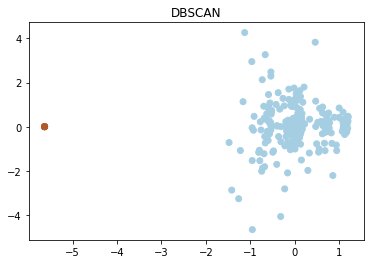

In [17]:
dbscan(EQT1, eps=1.7, min_samples=2)

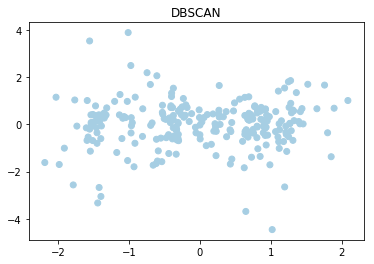

In [18]:
dbscan(EQT2, eps=1.7, min_samples=2)

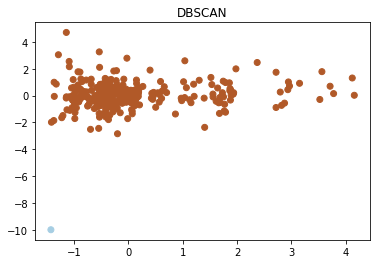

In [19]:
dbscan(EQT3, eps=1.7, min_samples=2)

# 4.3 Non Guassian Copula

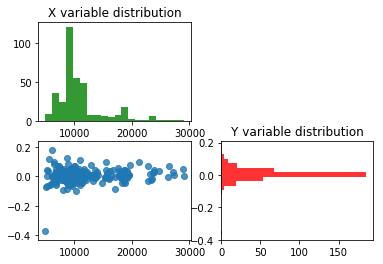

In [20]:
from copulalib.copulalib import Copula
from array import array 

# Data and histograms
def plotData():
    x = (BTC_df["Close"]).fillna(0).values
    y = (BTC_df['Returns']).fillna(0).values
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()
    
def generateCopulas():
    x = array((BTC_df["Close"]).fillna(0).values.tolist())
    y = array((BTC_df['Returns']).fillna(0).values.tolist())
    fig = plt.figure()
    
    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')
    plt.show()
    
#generateData()
plotData()
#generateCopulas() 

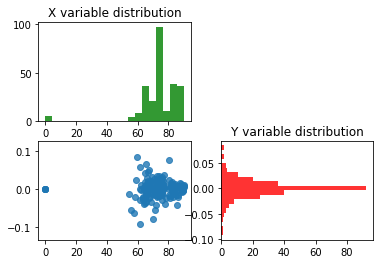

In [21]:
# Data and histograms
def plotData():
    x = (EQT_ETF_df["Close"]).fillna(0).values
    y = (EQT_ETF_df['Returns']).fillna(0).values
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()
    
def generateCopulas():
    x = array((EQT_ETF_df["Close"]).fillna(0).values.tolist())
    y = array((EQT_ETF_df['Returns']).fillna(0).values.tolist())
    fig = plt.figure()
    
    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')
    plt.show()
    
#generateData()
plotData()
#generateCopulas() 